In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a small dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define a simple three layer perceptron, 2 nodes for input layer, 4 nodes for hidden layer, 1 node for output layer
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4, bias=False)
        self.fc2 = nn.Linear(4, 1, bias=False)

    def forward(self, x):
        x1 = torch.sigmoid(self.fc1(x))
        x2 = torch.sigmoid(self.fc2(x1))
        return x1,x2

# Instantiate the model
model = XORModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Store
rayleigh_quotients_fc1 = [[] for _ in range(4)]
rayleigh_quotients_fc2 = []
losses = []



# Train the model
for epoch in range(10000):
    model.train()
    optimizer.zero_grad()
    x1, outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()


    if epoch % 500 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
        
        # Compute Rayleigh quotient for each layer
        with torch.no_grad():
            covariance_mat = torch.cov(X.T)  # Compute the input covariance matrix
            print(covariance_mat)

            for i in range(model.fc1.out_features):  # For each node in fc1
                w = model.fc1.weight[i, :].unsqueeze(1)  # Weight vector of node i
                # print(w)
                numerator = torch.mm(torch.mm(w.T, covariance_mat), w)
                denominator = torch.mm(w.T, w) * torch.trace(covariance_mat)
                print(torch.trace(covariance_mat))
                # print("numerator:" + str(numerator))
                # print("denominator:" + str(denominator))
                rq = (numerator / denominator).item()
                print(numerator/denominator,rq)
                print(f"Node {i + 1} in fc1, Rayleigh Quotient: {rq}")
                print(f"weights: {w.T}")
                rayleigh_quotients_fc1[i].append(rq)

            # For fc2 (only one node)
            output_layer_cov_mat = torch.cov(x1.T)  # Compute the input covariance matrix for output layer
            w = model.fc2.weight.squeeze().unsqueeze(1)
            numerator = torch.mm(torch.mm(w.T, output_layer_cov_mat), w)
            denominator = torch.mm(w.T, w) * torch.trace(output_layer_cov_mat)
            rq = (numerator / denominator).item()
            print(output_layer_cov_mat)
            print(f"Rayleigh Quotient for fc2: {rq}")
            print(f"weights: {w.T}")
            print('\n\n')
            rayleigh_quotients_fc2.append(rq)

        losses.append(loss.detach().numpy())

# Evaluate the model
with torch.no_grad():
    first_layer, predicted = model(X)
    predicted = torch.round(predicted)
    print("Predicted:", predicted)




Epoch 1, Loss: 0.6952511072158813
tensor([[ 0.2628, -0.0020],
        [-0.0020,  0.2574]])
Node 1 in fc1, Rayleigh Quotient: 0.5055009126663208
weights: tensor([[ 0.5952, -0.3915]], requires_grad=True)
Node 2 in fc1, Rayleigh Quotient: 0.49796873331069946
weights: tensor([[ 0.1975, -0.6235]], requires_grad=True)
Node 3 in fc1, Rayleigh Quotient: 0.49397823214530945
weights: tensor([[-0.2998, -0.5698]], requires_grad=True)
Node 4 in fc1, Rayleigh Quotient: 0.49417436122894287
weights: tensor([[-0.3054, -0.5259]], requires_grad=True)
tensor([[0.0080, 0.0055, 0.0005, 0.0002],
        [0.0055, 0.0067, 0.0046, 0.0041],
        [0.0005, 0.0046, 0.0061, 0.0058],
        [0.0002, 0.0041, 0.0058, 0.0055]])
Rayleigh Quotient for fc2: 0.049136947840452194
weights: tensor([[ 0.1253, -0.3475,  0.1977,  0.2529]], requires_grad=True)



Epoch 501, Loss: 0.13252490758895874
tensor([[ 0.2628, -0.0020],
        [-0.0020,  0.2574]])
Node 1 in fc1, Rayleigh Quotient: 0.4998916685581207
weights: tensor([[ 

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a small dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x1 = torch.sigmoid(self.fc1(x))
        x2 = torch.sigmoid(self.fc2(x1))
        return x1, x2

def train_model():
    model = XORModel()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(30000):
        model.train()
        optimizer.zero_grad()
        _, outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

    return loss.item()

# Run 50 times and track losses
final_losses = []
for i in range(50):
    final_loss = train_model()
    final_losses.append(final_loss)
    print(f"Run {i+1}: Final Loss = {final_loss:.6f}")

# Report the highest loss
highest_loss = max(final_losses)
print(f"\nHighest Final Loss: {highest_loss:.6f}")

# Additional statistics
average_loss = sum(final_losses) / len(final_losses)
min_loss = min(final_losses)

print(f"Average Final Loss: {average_loss:.6f}")
print(f"Minimum Final Loss: {min_loss:.6f}")
print(f"Range of Final Losses: {highest_loss - min_loss:.6f}")

Run 1: Final Loss = 0.000000
Run 2: Final Loss = 0.000000
Run 3: Final Loss = 0.000000
Run 4: Final Loss = 0.000000
Run 5: Final Loss = 0.000000
Run 6: Final Loss = 0.000000
Run 7: Final Loss = 0.000000
Run 8: Final Loss = 0.000000
Run 9: Final Loss = 0.000000
Run 10: Final Loss = 0.000000
Run 11: Final Loss = 0.000000
Run 12: Final Loss = 0.000000
Run 13: Final Loss = 0.000000
Run 14: Final Loss = 0.000000
Run 15: Final Loss = 0.346574
Run 16: Final Loss = 0.000000
Run 17: Final Loss = 0.000000
Run 18: Final Loss = 0.000000
Run 19: Final Loss = 0.000000
Run 20: Final Loss = 0.000000
Run 21: Final Loss = 0.000000
Run 22: Final Loss = 0.000000
Run 23: Final Loss = 0.000000
Run 24: Final Loss = 0.000000
Run 25: Final Loss = 0.000000
Run 26: Final Loss = 0.000000
Run 27: Final Loss = 0.000000
Run 28: Final Loss = 0.000000
Run 29: Final Loss = 0.000000
Run 30: Final Loss = 0.000000
Run 31: Final Loss = 0.000000
Run 32: Final Loss = 0.000000
Run 33: Final Loss = 0.000000
Run 34: Final Loss 

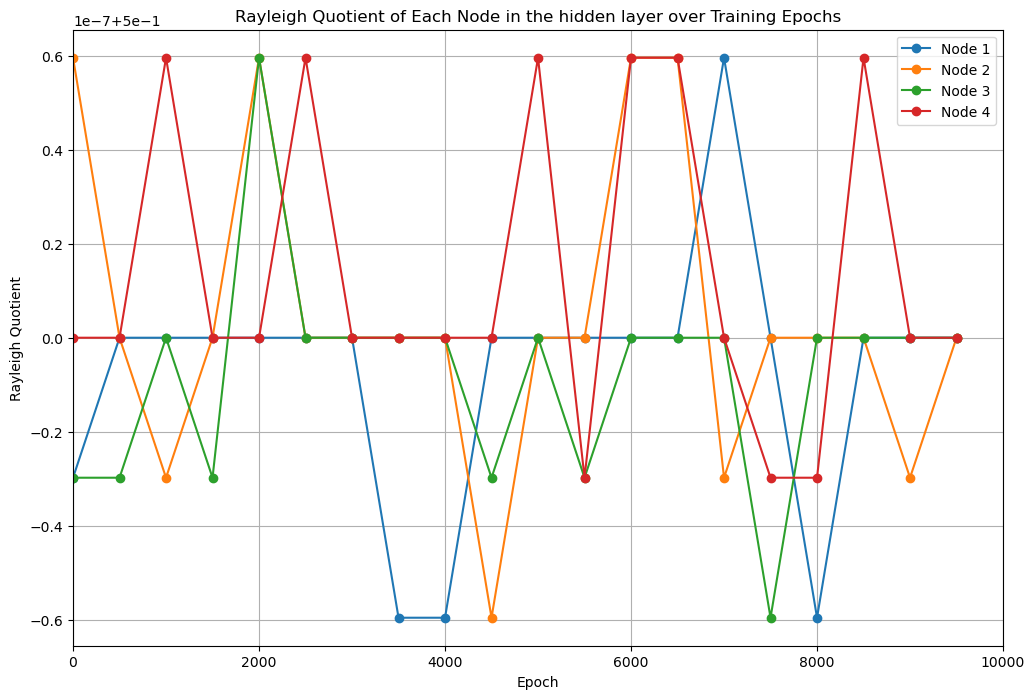

In [147]:
import matplotlib.pyplot as plt
3
# Assuming rayleigh_quotients_fc1 is already filled with Rayleigh quotients at every 500 epochs
# Let's plot them

epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
for i in range(len(rayleigh_quotients_fc1)):
    plt.plot(epochs, rayleigh_quotients_fc1[i], marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Rayleigh Quotient of Each Node in the hidden layer over Training Epochs')
plt.xlabel('Epoch')
plt.xlim(0,10000)
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
print(rayleigh_quotients_fc1)


[[0.5, 0.5, 0.5000000596046448, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4999999701976776, 0.5000000596046448, 0.5000000596046448, 0.5, 0.4999999701976776, 0.5000000596046448, 0.5, 0.4999999701976776, 0.5000000596046448, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4999999701976776, 0.5, 0.5, 0.4999999701976776, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.4999999701976776, 0.5, 0.5000000596046448, 0.5, 0.4999999403953552, 0.5, 0.5, 0.5000000596046448, 0.5, 0.5, 0.4999999701976776, 0.5, 0.4999999701976776, 0.5, 0.5000000596046448, 0.5000000596046448, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5000000596046448, 0.5, 0.49999991059303284, 0.5, 0.5, 0.5000000596046448, 0.5000000596046448, 0.5000000596046448, 0.4999999701976776, 0.5, 0.5, 0.5, 0.4999999701976776, 0.5000000596046448, 0.5000000596046448, 0.5]]


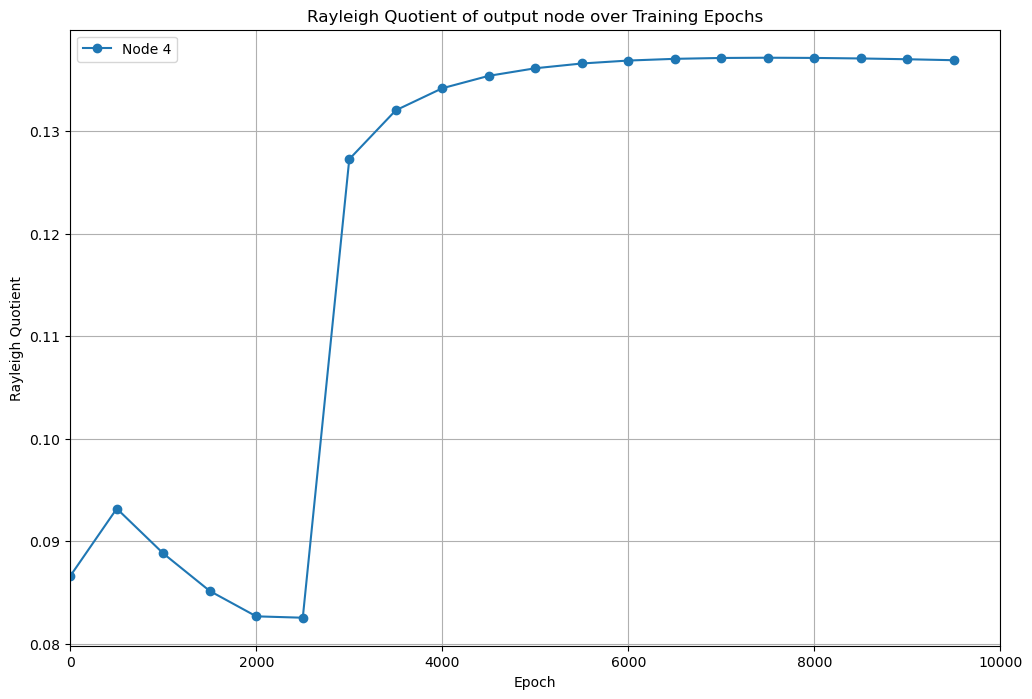

In [8]:
import matplotlib.pyplot as plt

# Assuming rayleigh_quotients_fc1 is already filled with Rayleigh quotients at every 500 epochs
# Let's plot them

epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
plt.plot(epochs, rayleigh_quotients_fc2, marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Rayleigh Quotient of output node over Training Epochs')
plt.xlabel('Epoch')
plt.xlim(0,10000)
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()

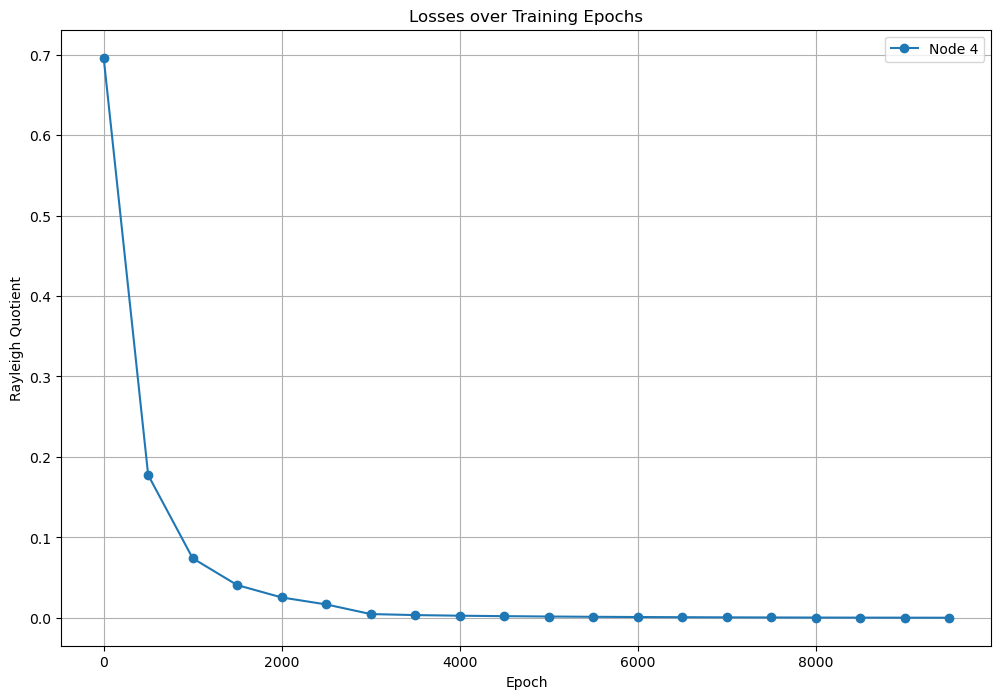

In [9]:
import matplotlib.pyplot as plt


epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
plt.plot(epochs, losses, marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Losses over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
losses

[array(0.6974676, dtype=float32),
 array(0.12284509, dtype=float32),
 array(0.04368497, dtype=float32),
 array(0.02265617, dtype=float32),
 array(0.01369413, dtype=float32),
 array(0.0089924, dtype=float32),
 array(0.00621367, dtype=float32),
 array(0.00444069, dtype=float32),
 array(0.00324852, dtype=float32),
 array(0.00241636, dtype=float32),
 array(0.00181938, dtype=float32),
 array(0.00138237, dtype=float32),
 array(0.00105743, dtype=float32),
 array(0.00081306, dtype=float32),
 array(0.00062759, dtype=float32),
 array(0.0004859, dtype=float32),
 array(0.00037705, dtype=float32),
 array(0.00029311, dtype=float32),
 array(0.00022816, dtype=float32),
 array(0.0001778, dtype=float32)]

In [69]:
x = torch.tensor([[0,0],
     [0,1],
     [1,0],
     [1,1]])
x_transpose = x.T

In [70]:
torch.mm(x_transpose, x) / (x.shape[0] - 1)

tensor([[0.6667, 0.3333],
        [0.3333, 0.6667]])

In [71]:
torch.cov(x_transpose)

tensor([[0.3333, 0.0000],
        [0.0000, 0.3333]])

In [72]:
# Transpose the data to have variables in columns
x_transpose = x.T

# Calculate the covariance matrix using torch.cov()
cov_matrix_from_cov = torch.cov(x_transpose)

# Calculate the covariance matrix using torch.mm() and scale
scaled_cov_matrix = torch.mm(x_transpose, x) / (x.shape[0] - 1)

In [73]:
cov_matrix_from_cov

tensor([[0.3333, 0.0000],
        [0.0000, 0.3333]])

In [74]:
scaled_cov_matrix

tensor([[0.6667, 0.3333],
        [0.3333, 0.6667]])

In [83]:
centered_x = torch.tensor([[-.5,-.5],
     [-.5,.5],
     [.5,-.5],
     [.5,.5]])
cov_matrix = torch.mm(centered_x.T,centered_x)/(x.shape[0]-1)


In [84]:
cov_matrix

tensor([[0.3333, 0.0000],
        [0.0000, 0.3333]])

In [113]:
weight = torch.tensor([[1],
                       [2]])
result = torch.mm(weight.T, weight)
print(result)

tensor([[5]])


In [112]:
result_2 = torch.sum(weight * weight)
print(result_2)


tensor(5)


In [ ]:
X = [[a_1,a_2,a_3,a_4,a_5],[b_1,b_2,b_3,b_4,b_5]]
180*5

[2*4] * [4*2] = 2*2 cov matrix, how the columns vary
[0,0]
[0,1]
[1,0]
[1,1]
[[1/3, 0],
 [0, 1/3]]

In [127]:
covariance_mat = cov_matrix
w = torch.tensor([[.6],[-10.7]])
numerator = torch.mm(torch.mm(w.T, covariance_mat), w)
denominator = torch.mm(w.T, w) * torch.trace(covariance_mat)
print(torch.trace(covariance_mat))
print("numerator:" + str(numerator))
print("denominator:" + str(denominator))
rq = (numerator / denominator).item()
print(numerator/denominator,rq)
print(f"Node {i + 1} in fc1, Rayleigh Quotient: {rq}")
print(f"weights: {w.T}")
rayleigh_quotients_fc1[i].append(rq)

tensor(0.6667)
numerator:tensor([[38.2833]])
denominator:tensor([[76.5667]])
tensor([[0.5000]]) 0.4999999403953552
Node 4 in fc1, Rayleigh Quotient: 0.4999999403953552
weights: tensor([[  0.6000, -10.7000]])


In [122]:
torch.mm(w.T, w)

tensor([[0.4194]])

In [ ]:
# Zero covariance is 0.5 Rayleigh quotient no matter the weights, can't capture
# 1 is maximized, 0 is minimized(smallest eigenvector). 

In [132]:
print(torch.sigmoid(torch.tensor(0)))
print(torch.sigmoid(torch.tensor(-0.24)))
print(torch.sigmoid(torch.tensor(-0.37)))
print(torch.sigmoid(torch.tensor(-0.61)))

tensor(0.5000)
tensor(0.4403)
tensor(0.4085)
tensor(0.3521)


In [137]:
torch.var(torch.tensor([[0.5000,0.4403,0.4085,0.3521]]))

tensor(0.0038)

In [20]:
import torch
#PCA Matrix Multiplication
#taking the [math,english,arts] scores for students and reducing 
#to two dimensions instead of 3, ignore y_train, labels could be like what school they are from
matrix1 = torch.tensor([[90,60,90],
                 [90,90,30],
                 [60,60,60],
                 [60,60,90],
                 [30,30,30]], dtype=torch.float)
#top 2 eigenvectors corresponding to the greatest eigenvalues
eigenvector_matrix = torch.tensor([[1.05594,-0.50494],
                                  [0.69108,-0.67548],
                                  [1,1]], dtype=torch.float)
# print(matrix1.shape)
centered_matrix = matrix1 - torch.mean(matrix1, dim=0)
print(torch.matmul(centered_matrix,eigenvector_matrix))

tensor([[ 55.3426,  17.8814],
        [ 16.0750, -62.3830],
        [ -6.3356,   3.0296],
        [ 23.6644,  33.0296],
        [-88.7462,   8.4422]])
